In [1]:
from google.colab import drive
import json
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
reviews_file = open('/gdrive/My Drive/reviews3_large.txt', 'r')
reviews = json.loads(reviews_file.read())

In [3]:
print(len(reviews))

4079


In [6]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
DESC = 'description'
RATING = 'rating'

review_descriptions = []
review_ratings = []
for review in reviews:
  review_descriptions.append(review[DESC])
  review_ratings.append(review[RATING])

In [13]:
print(len([x for x in review_ratings if x == '1']) / len(review_ratings))

0.039715616572689384


In [0]:
review_descriptions_set = set()
for review in reviews:
  review_descriptions_set.add(review['description'])

In [15]:
len(review_descriptions_set)

3842

In [0]:
import random

random.shuffle(reviews)

filtered_reviews = []

for review in reviews:
  if (review['rating'] == '5' and random.randrange(1, 10) > 6):
    filtered_reviews.append(review)
  elif (review['rating'] != '5'):
    filtered_reviews.append(review)  


In [31]:
len(filtered_reviews)

1797

In [0]:
DESC = 'description'
RATING = 'rating'

review_descriptions = []
review_ratings = []
for review in  filtered_reviews:
  review_descriptions.append(review[DESC])
  review_ratings.append(review[RATING])

In [33]:
len(review_descriptions)

1797

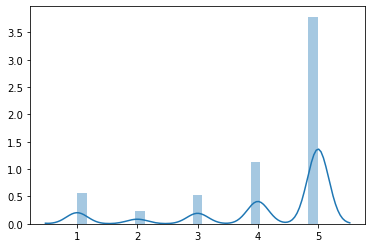

In [34]:
sns.distplot(review_ratings)

In [41]:
print(len([x for x in review_ratings if x == '5']) / len(review_ratings))

0.6060100166944908


In [0]:
review_ratings

['5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '1',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '3',
 '5',
 '5',
 '5',
 '3',
 '5',
 '5',
 '1',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '3',
 '5',
 '2',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '1',
 '5',
 '5',
 '1',
 '5',
 '5',
 '5',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '4',
 '3',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '2',
 '4',
 '5',
 '5',
 '5',
 '3',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '3',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '1',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '1',
 '3',
 '5',
 '2',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4'

In [0]:
%tensorflow_version 2.x

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokens = []
for description in review_descriptions:
  tokens.extend(description.split(" "))

tokenizer = Tokenizer()

tokenizer.fit_on_texts(tokens)
review_descriptions_tokenized = tokenizer.texts_to_sequences(review_descriptions)

In [0]:
len(review_descriptions_tokenized)

4079

In [0]:
valid_cutoff = len(review_descriptions_tokenized) - 500

X_train = review_descriptions_tokenized[0:valid_cutoff]
y_train = review_ratings[0:valid_cutoff]

X_test = review_descriptions_tokenized[valid_cutoff:]
y_test = review_ratings[valid_cutoff:]


In [0]:
# truncate and pad input sequences
max_review_length = 50
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length, padding="post")
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length, padding="post")

In [0]:
import numpy

y_train = numpy.array([1 if int(x)>3 else 0 for x in y_train])
y_test = numpy.array([1 if int(x)>3 else 0 for x in y_test])

In [0]:
len(y_train)

3579

In [0]:
len(X_train)

3579

In [0]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(len(tokens), embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(400, input_shape=(len(tokens), embedding_vecor_length, max_review_length), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(400, input_shape=(400, 1, max_review_length), return_sequences=True))
model.add(LSTM(400, input_shape=(400, 1, max_review_length)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(numpy.array(X_train), y_train, epochs=3, batch_size=64)


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 50, 32)            933664    
_________________________________________________________________
lstm_52 (LSTM)               (None, 50, 400)           692800    
_________________________________________________________________
dropout_24 (Dropout)         (None, 50, 400)           0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 50, 400)           1281600   
_________________________________________________________________
lstm_54 (LSTM)               (None, 400)               1281600   
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 2005      
Total params: 4,191,669
Trainable params: 4,191,669
Non-trainable params: 0
___________________________________________

ValueError: ignored

In [0]:
# Final evaluation of the model
print(len([x for x in y_test if x == 0]))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

41
Accuracy: 91.40%
